In [1]:
import numpy as np
import shared_functions as sf
import sympy as sp
from IPython.display import HTML
import matplotlib.pyplot as plt

In the last notebook we left off by examining by what happens if we take 3 fixed points on a parabola, and how to choose an a value for the 4th point that would maximise the area. Along the way we also came up with some formulas derived from Meister for polygons whose vertices were on curves. Let's start by including the handy functions we have at our disposal so far: 

In [2]:
def compute_cross_product_from_two_points(points_list):
    c = points_list[0][0] * points_list[1][1] - points_list[0][1] * points_list[1][0]
    return(c)

def compute_signed_area_of_triangle_from_two_points(points_list):
    c = compute_cross_product_from_two_points(points_list)
    signed_area = c / 2
    return(signed_area)

def compute_signed_area_using_meisters_formula(points_list):

    total_signed_area = 0
    for each_point in range(len(points_list) - 1):
        signed_area = compute_signed_area_of_triangle_from_two_points([points_list[each_point], points_list[each_point + 1]])
        total_signed_area = total_signed_area + signed_area

    final_signed_area = compute_signed_area_of_triangle_from_two_points([points_list[-1], points_list[0]])
    total_signed_area = total_signed_area + final_signed_area

    return(total_signed_area)

def compute_using_meister_with_parabola_paramatisation(a, b, c, d):
    return (((d - b) * (c - a)* (d - a + b - c)) / 2)


Now let's turn our attention to consider another constraint. What if, instead of making $t$ a value that would maximise the value of the area of the quadrilateral, the value $t$ was chosen to ensure our quadrilateral was a specific kind of quadrilateral, such as a trapezoid?

There are a few things needed to do this: we need to consider when two lines in the quadrilateral would be parallel. And in our dealings with Meister, we haven't talked about lines yet. So far we have been considering just points, so lets start constructing lines from points.

$$  \ell=AB=(bf-ce:cd-af:ae-bd). $$

Also, once we have lines constructed from points, we need to consider when they are parallel. And for that we need to lines, in projective form, say $\ell_1 = [a, b, c]$ and $\ell_2 = [d, e, f]$ and for the following relationship to hold: 

$$ bf - ce = 0 $$

Before we do any of that, sounds like we need to convert our points into projective form. So let's create some functions: first, a function to convert points to projective form; second, a function to create line from two points(join of points formula) and; third, a function to asertain if two lines are paralell or not:

In [3]:
def convert_point_to_projective_form(point_list):
    lcd = denominator(sum(point_list))
    normalised_list = [lcd * x for x in point_list]
    normalised_list.insert(0, lcd)
    return(np.array(normalised_list))

def compute_join_of_two_points(projective_points_list):
    a = projective_points_list[0][0]
    b = projective_points_list[0][1]
    c = projective_points_list[0][2]
    d = projective_points_list[1][0]
    e = projective_points_list[1][1]
    f = projective_points_list[1][2]
    return(np.array([b* f - c* e, c * d - a * f, a * e - b * d]))


# For this function, we will return a list - the value computed, and a boolean to let us know if the lines are parallel or not.
def compute_parallel_relationship_between_2_lines(lines_list):
    b = lines_list[0][1]
    f = lines_list[1][2]
    c = lines_list[0][2]
    e = lines_list[1][1]
    
    val_needed_to_check_parallel = b * f - c * e
    return([val_needed_to_check_parallel, val_needed_to_check_parallel == 0])
    

With these new functions set up, let's start with a visualisation: 3 fixed points. Our goal is to find a 4th point that that will make this quadrilateral a trapezoid

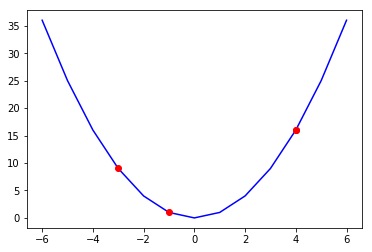

In [4]:
fig, ax = plt.subplots()
x2 = np.arange(start=-6, stop=7, step=1)
y2 = x2^2

points_choice = np.array([[4,16], [-3,9], [-1,1]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'ro')


We need lines to do this and to get lines, we need points in projective form. Let's convert the points, and create some lines, or joins of points

In [5]:
t = sp.symbols('t')

p1 = convert_point_to_projective_form([4,16])
p2 = convert_point_to_projective_form([-3,9])
p3 = convert_point_to_projective_form([-1, 1])
p4 = np.array([1, t, t^2])

l1 = compute_join_of_two_points([p1, p2])
l2 = compute_join_of_two_points([p3, p4])


We have lines. Now we check if they are parallel:

In [6]:
r = compute_parallel_relationship_between_2_lines([l1, l2])
r[0].factor()

-7*(t - 2)*(t + 1)

The value returned means that in order for the lines to be parallel, this expression needs to equal 0. So let's set zero, and solve to find a value of $t$ which ensure our lines are parallel:

In [7]:
e = sp.Eq(r[0].factor(), 0)
sp.solve(e, t)

[-1, 2]

Two results come back. The -1 just gives us a point we already have. But also get 2. Let's use it to construct a 4th point:

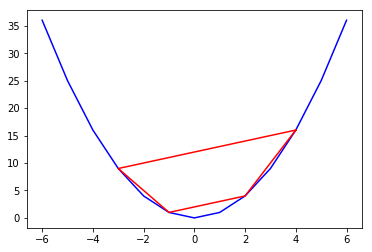

In [8]:
fig, ax = plt.subplots()
x2 = np.arange(start=-6, stop=7, step=1)
y2 = x2^2

points_choice = np.array([[4,16], [-3,9], [-1,1], [2, 4]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'r')

And now solve for the area of a trapezoid: 

In [9]:
s = compute_using_meister_with_parabola_paramatisation(4, -3, -1, 2)
s

50

Its worth noting, we could also switch the order of the points. If we are assuming parallel lines were not what you see in the in figure above, by the other 2 sides. Let's do that go get a really interesting result:

In [10]:
l1 = compute_join_of_two_points([p1, p4])
l2 = compute_join_of_two_points([p3, p2])
r = compute_parallel_relationship_between_2_lines([l1, l2])
r[0].factor()
e = sp.Eq(r[0].factor(), 0)
sp.solve(e, t)

[-8, 4]

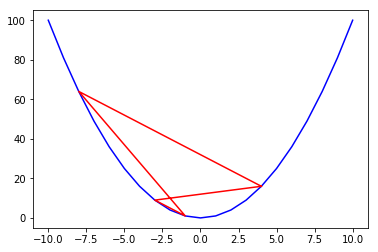

In [11]:
fig, ax = plt.subplots()
x2 = np.arange(start=-10, stop=11, step=1)
y2 = x2^2

points_choice = np.array([[4,16], [-3,9], [-1,1], [-8, 64]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'r')

In [12]:
s = compute_using_meister_with_parabola_paramatisation(4, -3, -1, -8)
s

-175

So this seems strange, but we are still looking at something that meets definition of an orientated quadrilateral, with 2 parallel sides, and from which we can derive an area.

Enough parabolas! Let's now have a look at the <b>cubic case</b>. 

As we might expect, Meister's formula gives us a nice looking output when we put in 4 general points and ensure they can satisfy the parameterisation $y = x^3$:

In [14]:
t_1, t_2, t_3 = sp.symbols('t_1, t_2, t_3')
points_choice = np.array([[t_1,t_1^3], [t_2,t_2^3], [t_3,t_3^3]])
s = compute_signed_area_using_meisters_formula(points_choice)
show(s.factor())

-1/2*(t_1 + t_2 + t_3)*(t_1 - t_2)*(t_1 - t_3)*(t_2 - t_3)

Again, Sympy does the signs in that wierd sympy way, but this is equivalent to: 

$$  s(\widetilde{A_1A_2A_3})=\frac{(t_1-t_2)(t_2-t_3)(t_3-t_1)(t_1+t_2+t_3)}{2}.$$

Let's create a function for it:

In [16]:
def compute_using_meister_with_cubic_paramatisation(a, b, c, d):
    return (((a - b) * (b - c)*(c-a)* ( a + b - c)) / 2)

Things are heating up. We are looking at this, but also some functions for looking at some really utility type functions, collinearity, parallelism and stuff. 